In [3]:
import pandas as pd
ventas_df = pd.read_csv('../data/tienda_ventas.csv', index_col = 'id')
ventas_df

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.00000,0
1,2013-01-01,1,BABY CARE,0.00000,0
2,2013-01-01,1,BEAUTY,0.00000,0
3,2013-01-01,1,BEVERAGES,0.00000,0
4,2013-01-01,1,BOOKS,0.00000,0
...,...,...,...,...,...
2161561,2016-04-30,9,POULTRY,826.35300,0
2161562,2016-04-30,9,PREPARED FOODS,165.65399,0
2161563,2016-04-30,9,PRODUCE,2012.72700,1


 queremos saber las ventas por mes, asique vamos a crear una columna para poder identificar el mes
 las fechas las podemos transformas con pandas, podemos seleccionar los 7 primeros caracteres, porqué todas las fechas dentro de pandas se guardan como una cadena de texto, y puedo selecionar y crear subcadenas
 *con la instruccion lambda de pyhton podemos crear una funcion sin tener que saltar de linea y poner def.

In [4]:
ventas_df['month'] = ventas_df['date'].apply(lambda x: x[:7])
ventas_df

,date,store_nbr,family,sales,onpromotion,month
id,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.00000,0,2013-01
1,2013-01-01,1,BABY CARE,0.00000,0,2013-01
2,2013-01-01,1,BEAUTY,0.00000,0,2013-01
3,2013-01-01,1,BEVERAGES,0.00000,0,2013-01
4,2013-01-01,1,BOOKS,0.00000,0,2013-01
...,...,...,...,...,...,...
2161561,2016-04-30,9,POULTRY,826.35300,0,2016-04
2161562,2016-04-30,9,PREPARED FOODS,165.65399,0,2016-04
2161563,2016-04-30,9,PRODUCE,2012.72700,1,2016-04


como queremos saber las ventas por mes, ahora agrupamos todas las filas que tienen el mismo mes en una sola fila y sumamos el valor de sus ventas, así obtengo el número de ventas por cada mes

In [14]:
ventas_mes_df = ventas_df.groupby('month').agg({
    'sales': 'sum'
})

ventas_mes_df

,sales
month,
2013-01,1.032762e+07
2013-02,9.658960e+06
2013-03,1.142850e+07
2013-04,1.099346e+07
2013-05,1.159770e+07
2013-06,1.168934e+07
2013-07,1.125740e+07
2013-08,1.173779e+07
2013-09,1.179293e+07


Atención con el dato 2.511619e+03 ¿Qué quiere decir e+03 ? a este tipo de sintaxis se le denomina anotación científica, es una representación para no tener números extremadamente grandes, es como decir por 10 elevado a 3 es decir  2.511619e+03 =  2.511619 x $10^3$

Resuelta ya esta duda, ahora ya ha llegado el momento de ver todos estos datos en una gráfica y hacernos a la idea de cuando son los mejores y los peores meses de un solo vistazo 🥳

como en este caso la práctica es con un gráfico de linea, utilizamos plot de pandas y le especificamos con line que queremos un gráfico de líneas, dentro especificamos el eje 

<Axes: xlabel='month'>

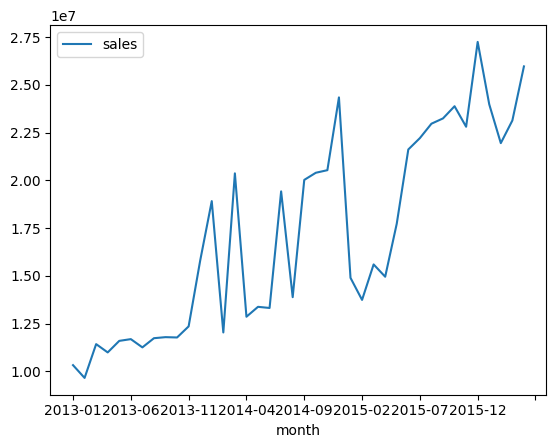

In [15]:
ventas_mes_df.plot.line(
    y='sales'
    
)

faltan títulos para saber a que se refiere, estaría bien tener una cuadricula, más en adeltante practicaré cómo personalizar esta grafíca, ahora veremos una pequeña personalización,
primero de todo tener claros los puntos en los que coinciden el eje x y el y, se les llama marcadores

<Axes: xlabel='month'>

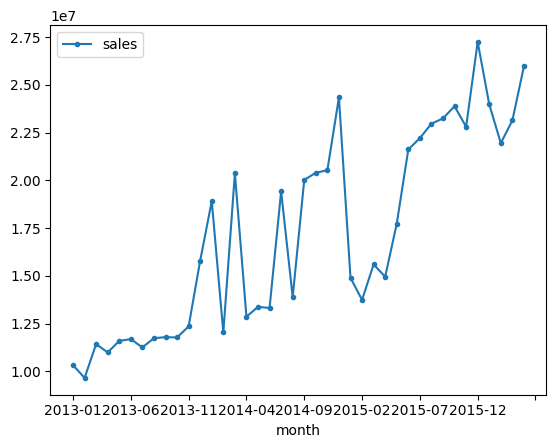

In [16]:
ventas_mes_df.plot.line(
    y='sales',
    style='.-'
    
)

C:\Users\david\AppData\Roaming\Python\Python312\site-packages\pandas\plotting\_matplotlib\core.py:975: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


<Axes: xlabel='month'>

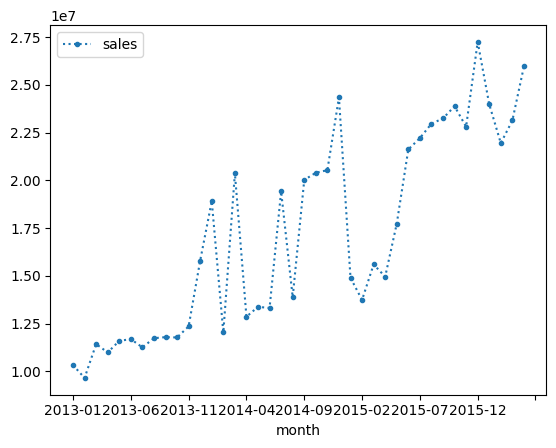

In [18]:
ventas_mes_df.plot.line(
    y='sales',
    style='.-',
    linestyle='dotted' 
)

ahora vamos hacer el mismo gráfico pero con plottly


In [19]:
import plotly.express as px


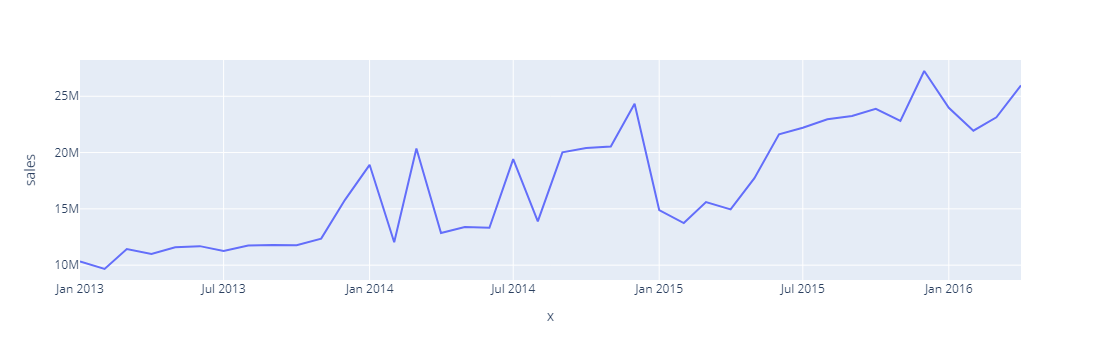

In [23]:
fig_ventas_mes = px.line(
    ventas_mes_df,
    x= ventas_mes_df.index.values,
    y='sales'
)
fig_ventas_mes.show()

Nuestro objetivo actual va ser visualizar como se comparan las ventas de tres familias de productos diferentes en el 2015
comida de mar, lacteos y carnes, para ello vamos a utilizar un gráfico multilineas , como queremos comparar esas tres familias las tres lineas superpuestas nas va a dar una visión muy clara.

Ahora tengo que modificar los datos para poder generar una linea por cada grupo de grafico.

In [ ]:
Primer objetivo
Analizar solo el año 2015

In [8]:
ventas_df['year'] = ventas_df['date'].apply(lambda x:x[:4])
# pasamos el 4 porque dentro del campo date queremos que selecione hasta el caracter 4 2013-01-01	, los 4 primeros es el año.
ventas_df

,date,store_nbr,family,sales,onpromotion,month,year
id,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.00000,0,2013-01,2013
1,2013-01-01,1,BABY CARE,0.00000,0,2013-01,2013
2,2013-01-01,1,BEAUTY,0.00000,0,2013-01,2013
3,2013-01-01,1,BEVERAGES,0.00000,0,2013-01,2013
4,2013-01-01,1,BOOKS,0.00000,0,2013-01,2013
...,...,...,...,...,...,...,...
2161561,2016-04-30,9,POULTRY,826.35300,0,2016-04,2016
2161562,2016-04-30,9,PREPARED FOODS,165.65399,0,2016-04,2016
2161563,2016-04-30,9,PRODUCE,2012.72700,1,2016-04,2016


Ahora vamos a filtrar para que nos muestre solo las del año 2015

In [10]:
ventas_2015_df = ventas_df[
    ventas_df['year'] == '2015'
]
ventas_2015_df

,date,store_nbr,family,sales,onpromotion,month,year
id,,,,,,,
1297296,2015-01-01,1,AUTOMOTIVE,0.000,0,2015-01,2015
1297297,2015-01-01,1,BABY CARE,0.000,0,2015-01,2015
1297298,2015-01-01,1,BEAUTY,0.000,0,2015-01,2015
1297299,2015-01-01,1,BEVERAGES,0.000,0,2015-01,2015
1297300,2015-01-01,1,BOOKS,0.000,0,2015-01,2015
...,...,...,...,...,...,...,...
1945939,2015-12-31,9,POULTRY,734.391,0,2015-12,2015
1945940,2015-12-31,9,PREPARED FOODS,98.888,0,2015-12,2015
1945941,2015-12-31,9,PRODUCE,2888.340,0,2015-12,2015


Ahora vamos a filtrar para tener solo tres tipos de productos que queremos trabajar,
comida de mar, lacteos y carnes


In [16]:
ventas_2015_df = ventas_df[
    (ventas_df['year'] == '2015') &
    (ventas_df['family'].isin(['SEAFOOD','MEATS','DAIRY']))
# Estamos didiciendo que añada las que sean de 2015 y que ademas en el campo familia contengan una de las tres opciones del array
]
ventas_2015_df

,date,store_nbr,family,sales,onpromotion,month,year
id,,,,,,,
1297304,2015-01-01,1,DAIRY,0.000,0,2015-01,2015
1297320,2015-01-01,1,MEATS,0.000,0,2015-01,2015
1297328,2015-01-01,1,SEAFOOD,0.000,0,2015-01,2015
1297337,2015-01-01,10,DAIRY,0.000,0,2015-01,2015
1297353,2015-01-01,10,MEATS,0.000,0,2015-01,2015
...,...,...,...,...,...,...,...
1945902,2015-12-31,8,MEATS,382.466,0,2015-12,2015
1945910,2015-12-31,8,SEAFOOD,21.428,0,2015-12,2015
1945919,2015-12-31,9,DAIRY,878.000,1,2015-12,2015


ahora necesitamos hacer agrupaciones por mes, pero por separado por cada familia de productos.


In [17]:
group_family_ventas_2015_df = ventas_2015_df.groupby(['month', 'family']).agg({
    'sales': 'sum'
})

group_family_ventas_2015_df 


sales
month   family               
2015-01 DAIRY    1.134521e+06
        MEATS    5.431177e+05
        SEAFOOD  4.046584e+04
2015-02 DAIRY    1.020747e+06
        MEATS    4.987351e+05
        SEAFOOD  3.606656e+04
2015-03 DAIRY    1.234851e+06
        MEATS    5.465172e+05
        SEAFOOD  4.380847e+04
2015-04 DAIRY    1.181180e+06
        MEATS    5.223043e+05
        SEAFOOD  3.998347e+04
2015-05 DAIRY    1.293308e+06
        MEATS    5.916919e+05
        SEAFOOD  4.250683e+04
2015-06 DAIRY    1.243588e+06
        MEATS    5.650141e+05
        SEAFOOD  3.878055e+04
2015-07 DAIRY    1.244815e+06
        MEATS    5.949037e+05
        SEAFOOD  3.853559e+04
2015-08 DAIRY    1.263428e+06
        MEATS    5.812141e+05
        SEAFOOD  3.776758e+04
2015-09 DAIRY    1.224619e+06
        MEATS    5.627116e+05
        SEAFOOD  4.190637e+04
2015-10 DAIRY    1.314827e+06
        MEATS    5.807884e+05
        SEAFOOD  4.142396e+04
2015-11 DAIRY    1.283672e+06
        MEATS    5.359089e+05
        SEAFOOD  3.882376e+04
2015-12 DAIRY    1.394582e+06
        MEATS    5.673814e+05
        SEAFOOD  3.372828e+04

este formato no nos sirve para poder hacer la visualizacion necesitamos una columna por cada familia, hacer este cambio sobre un data frame se llama pivotar

In [20]:
pivot_ventas_2015_df = group_family_ventas_2015_df.reset_index(1).pivot(columns='family').droplevel(0, axis='columns')
pivot_ventas_2015_df

family,DAIRY,MEATS,SEAFOOD
month,,,
2015-01,1134521.0,543117.728891,40465.835012
2015-02,1020747.0,498735.076839,36066.561003
2015-03,1234851.0,546517.159221,43808.473074
2015-04,1181180.0,522304.280744,39983.471003
2015-05,1293308.0,591691.899734,42506.832015
2015-06,1243588.0,565014.130035,38780.552004
2015-07,1244815.0,594903.677368,38535.588006
2015-08,1263428.0,581214.143026,37767.580998
2015-09,1224619.0,562711.633157,41906.374010


¡Listo! Ahora ya tengo mi dataset listo para poder hacer la gráfica, esta en un formato "digerible"

<Axes: xlabel='month'>

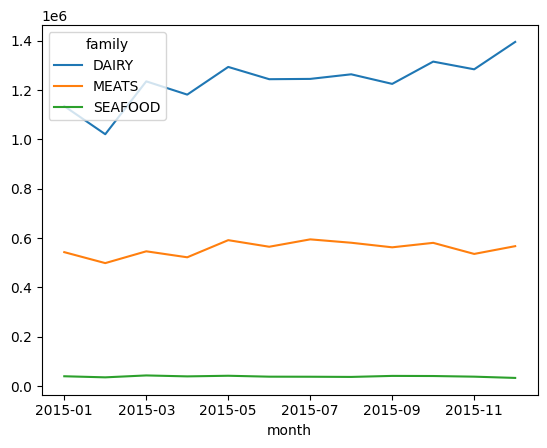

In [21]:
pivot_ventas_2015_df .plot.line()

como hay mucho más cambio entre los rangos de DAIRY que en SEAFOOD parece que los cambios de SEAFOOD sean imperceptibles
Para solucionar esto podemos hacer subgraficos

array([<Axes: xlabel='month'>, <Axes: xlabel='month'>,
       <Axes: xlabel='month'>], dtype=object)

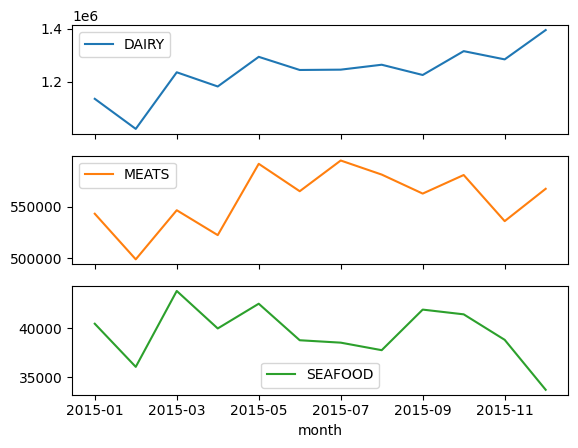

In [22]:
pivot_ventas_2015_df .plot.line(
    subplots = True
)